# Programming Project November 2019


## by Claire Nolan (Student Number G00376464)



# 1. Introduction

Assignment:
1. create a dataset by simulating a real world phenomenon
   - must be able to be measeured
   - collect >100 data points over 4 variables
   - investigate type of variables, distributions, relationships with each other
2. Model and syntesis data using Python (numpy.random package)
   - synthesise/simulate dataset matching their properties as possible
3. Detail research and implement the simulation in this notebook

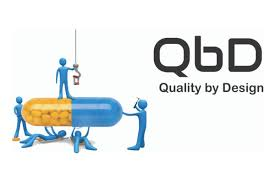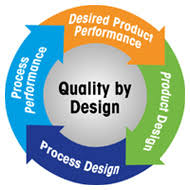

# 2. Creating a dataset by simulating a real world phenomenon

I work within the pharamceutical industry which is a heavily regulated industry. One of the key regulatory agencies is the US FDA regulatory agency. The Food and Drug Administration (FDA or USFDA) is a federal agency of the United States Department of Health and Human Services, one of the United States federal executive departments. The FDA is responsible for protecting and promoting public health through the control and supervision of food safety, tobacco products, dietary supplements, prescription and over-the-counter pharmaceutical drugs (medications), vaccines, biopharmaceuticals, blood transfusions, medical devices, electromagnetic radiation emitting devices (ERED), cosmetics, animal foods & feed and veterinary products. T

Another key group is the International Council for Harmonisation of Technical Requirements for Pharmaceuticals for Human Use (ICH). This is an initiative that brings together regulatory authorities and pharmaceutical industry to discuss scientific and technical aspects of pharmaceutical product development and registration. The mission of the ICH is to promote public health by achieving greater harmonisation through the development of technical Guidelines and requirements for pharmaceutical product registration.

Since 2011 the FDA have requested that any new drugs to be manufactured must have all manufacturing inputs be fully understood to ensure good quality product is manufactured. These also align with the ICH guidelines Q7,8,9 and the guidelines by the Eurpoean medicines agency (EMA). These manufacturing inputs include raw materials, temperature, manufacturing conditions, time, operating parameters etc. The is known as the design space or quality by design (QBD). The theory is if the inputs are managed and controlled within the design space then the product is of good quality. Quality is usually defined as a number of outputs which must meet certain specifications.

For this project the inputs for one particular product which I currently work with will be simulated. This particular product has five key inputs which if they all remain within the design space then the consistency result will meet the registered specifications resulting in good quality product.




In [12]:
# The code below imports the excel file where the real world data can be invesigated  

#ref:https://datatofish.com/read_excel/ 

import pandas as pd

real = pd.read_excel (r"C:\Users\Claire Laptop\Desktop\ProgrammingProjectNOV2019\Real-World-Data-for-Programming-Project-Nov2019.xlsx") 
# the "r" is used before the path string to address special character, such as '\')

print (real)

       Batch ID   pH  Excipient-A-Assay   Excipient-B-viscosity   \
0    Batch 0001  6.1                14.0                 15750.0   
1    Batch 0002  6.0                14.0                 15750.0   
2    Batch 0003  5.9                13.9                 15637.5   
3    Batch 0004  6.0                13.8                 15525.0   
4    Batch 0005  6.0                13.5                 15187.5   
5    Batch 0006  5.9                13.5                 15187.5   
6    Batch 0007  5.9                13.5                 15187.5   
7    Batch 0008  5.9                13.7                 15412.5   
8    Batch 0009  5.8                13.8                 15525.0   
9    Batch 0010  6.0                13.8                 15525.0   
10   Batch 0011  5.9                13.9                 15637.5   
11   Batch 0012  5.8                15.6                 17550.0   
12   Batch 0013  5.8                14.9                 16762.5   
13   Batch 0014  5.7                15.2        

# 3. The dataset

The dataset that I will be simulating is based on a dataset I am currently working on in my job. There is an issue with a the consistency result of a cream product which is outside the specification. 

Creams are semi-solid emulsions of oil and water. They are semisolid dosage forms containing more than 20% water or volatile components and typically less than 50% hydrocarbons, waxes, or polyols as vehicles for one or more drug substances dissolved or dispersed in a suitable cream base. Consistency describes the degree to which a semi-fluid or semi-solid material resists deformation by an applied force ie how the cream performs when it is applied to the skin.

For this particular cream product there are  a number of variables which have an impact on the consistency results. These are the pH of the cream, excipient A assay, excipient B viscosity, excipient C LOD and how many times the pH had to be adjusted per batch to meet specification. The required specifications for each input are shown below:

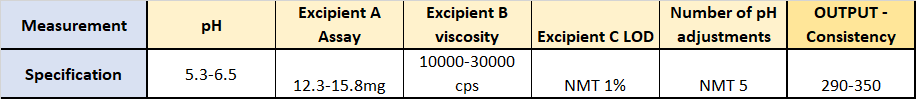

As part of the design space if the batch is manufactured within these specifiations for these parameters then the consistency result should also be in specification. 

Based on the historical data I already have collected, I know that all paramaters are normally distributed (Gaussian=distribution) except for the number of pH adjustments per batch which is a Poisson distribution.

To confirm this I will create a number of datasets with inputs within the specification range.

First I will import the required Python libraries. then $xxx.... KNN week 6$

## 3.1. Import various Python libraries into this Jupyter notebook¶

For this project I will import a number of the key libraries in Python for data analysis. These are described below:

### Numpy
For creating random data Numpy is the most imortant library. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. It is really efficient and quick at dealing with lists and data arrays containg large amounts of numbers and working on lists within lists in multidimensional arrays. The beauty of Numpy is that it can perform operations within these arrays.

### Pandas
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

### Seaborn
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

### Matplotlib
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

In [13]:
import numpy as np #this tells the program to generate random numbers from the numpy program

In [14]:
import matplotlib.pyplot as plt #matplot is the subprogram of python for generating plots

In [15]:
import pandas as pd #Imports the Pandas program

In [16]:
import seaborn as sns #import seaborn as sns

## 3.2 Creating a random dataset

The next steps is to create datasets for each variable within the desired specifications which are normally distributed or Poisson distributed. I am choosing to have 150 data points as this represents approximately six years of batch data as approximately 25 batches are manufactured per year.

Most of the inputs must be within certain specification ranges with even more specific limits so the code for the dataset will need to be even more specific which are described below. The historical standard deviations and means for each variable (except pH adjustments) are shown below for reference as these values will be used to cread the simulated datasets. 

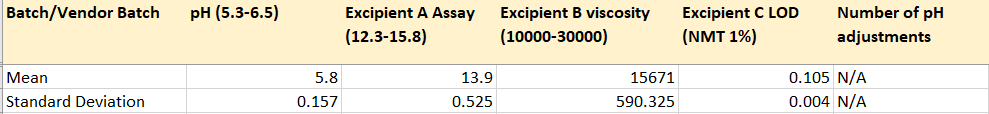

reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
https://www.sharpsightlabs.com/blog/numpy-random-normal/


### 3.2.1 Creating a dataset for the pH input

As per above the specification range is between 5.3-6.5 and it is desirable to have the mean result in the middle of this range. The data is normally distributed.

In [17]:
# This code is used to create a list of 150 data points between 0 and 1 to represent

x = np.random.randint(100, size=150) #ie create a list of 10 integers between 0 to 100 but not including 100.

print(x) # this tells the program to show the array


[ 0 52 97  5 16 44 29 48 50 86 17 96 57 32 78  1 21 94  0 76 21 84 91 79
 52 56 66 91 88 78 95 56  9 11 84 59 13 48 32 45 19 83 33 83 46 54 72 65
 71 56 33 53 59 73 68 49 35 68 71 99 99 51 96  6 84  4 23 21 99 35 59 39
 66 60 33  8  3 68  6  7 67 29 94 77 97 36 74 29 90 55 49 81 45 10 15 70
 23 36 24 69 25 72 98 76 78 44 96 11 10 83 93 52 30 30 62 21 22 99 42 56
 95 92 37 43 85 95 72 94  1 16 26  1 97 52 59 53 79 55 75 95 84 28 54 13
  7 15 83 34 51 43]


The above array is just a basic dataset. I want to now create a more representative dataset which is normally distributed within the range 5.3 to 6.5. 

Below is the basic code to create normally distributed random data with a specified mean and standard deviation. This is the syntax for the code:
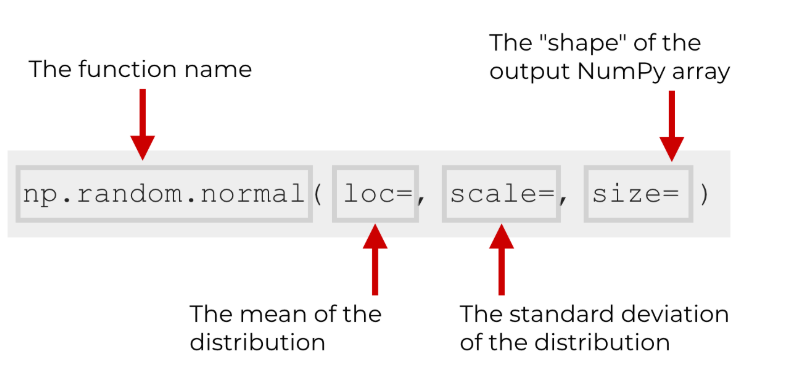
I know I want to create a dataset where the mean is in the middle of the specification range which is 5.9. I am also going to say the standard deviation is approximately 0.16 which is an educated estimate based on historical data.


[5.71934312 6.15307343 5.84652867 6.11116514 5.78351814 6.18845114
 5.86482094 5.7686558  5.39920738 5.9362715  5.80489237 5.97519564
 5.71558954 5.90516709 5.84116355 5.69715754 5.93184739 5.71904698
 6.00935437 5.88892641 5.78729874 5.94827584 5.68052384 6.19505686
 6.24553659 5.90140155 5.82022651 5.7215123  6.28075944 5.83491562
 5.90380743 5.6056105  5.98688437 5.63420472 6.05632688 5.82730765
 6.05356586 5.99031113 5.84423681 5.83875491 5.78679846 5.91099356
 5.57478249 5.97546994 5.722111   5.78440491 5.77678087 6.09260535
 6.12834878 5.87681332 5.88852468 5.90354751 5.84497681 6.02062103
 5.89283148 6.04135162 5.79577343 5.76413356 6.04134908 5.87803725
 6.3184153  6.13709092 5.85202466 5.83698278 5.89360301 5.84558402
 5.99810617 5.5480719  5.67015111 6.1575248  5.95422214 5.69898308
 5.78329533 5.94156659 5.72964482 5.92358865 5.84416773 5.80922585
 6.0245155  6.06514985 5.64227064 5.96196721 6.02405053 5.90515794
 5.99411453 5.77354782 5.95945282 6.03057842 5.84300132 5.8544

(array([ 1.,  5.,  7., 15., 38., 35., 30., 11.,  5.,  3.]),
 array([5.39920738, 5.49112817, 5.58304896, 5.67496976, 5.76689055,
        5.85881134, 5.95073213, 6.04265293, 6.13457372, 6.22649451,
        6.3184153 ]),
 <a list of 10 Patch objects>)

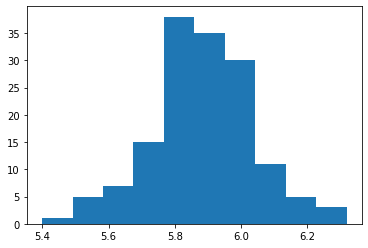

In [18]:
pH = np.random.normal(5.9, 0.16, 150) # ie create a list of 100 normally distributed numbers where mean is zero and standard deviation is 0.1

print(pH)

plt.hist(pH) # display results as a histogram plot

[5.84574972 6.10756009 6.05553024 5.89320968 5.87660893 5.85398843
 6.05943286 5.88704307 5.89227158 5.54905308 6.08136078 5.79511893
 5.83050619 6.01395911 5.98870283 5.7178479  5.71310127 5.93470386
 5.77798891 6.11119506 6.14813735 5.99621997 6.09540343 5.78371656
 5.61116676 5.62534541 6.06796133 5.76019601 5.88205626 6.03153299
 5.72969002 5.77954605 5.71402656 5.62480898 6.20493634 5.89379379
 5.54404111 5.66941625 6.16149736 5.58803029 5.87204477 5.97245913
 6.1836859  5.96434756 5.94440113 5.95999329 5.90890093 5.98106091
 5.94294243 6.01255172 6.02222636 6.07945185 5.80587888 5.8494289
 6.07426276 6.03235329 6.2090238  6.00899791 6.0633646  5.85718773
 6.05387198 5.91262704 5.92601438 6.17228747 5.99519619 5.95406784
 5.85102976 5.68688131 5.85791115 5.73684479 5.9530077  5.80914094
 5.8983294  5.97254977 6.01172058 6.17026443 5.92987119 6.13114817
 5.89272508 5.9578516  5.60669112 5.65044505 5.89361447 5.84048464
 5.80567981 5.72720211 6.05194561 5.70583922 6.23141566 5.70221

(array([ 6., 10., 14., 17., 22., 26., 22., 17., 11.,  5.]),
 array([5.5179506 , 5.59423016, 5.67050971, 5.74678927, 5.82306883,
        5.89934839, 5.97562795, 6.0519075 , 6.12818706, 6.20446662,
        6.28074618]),
 <a list of 10 Patch objects>)

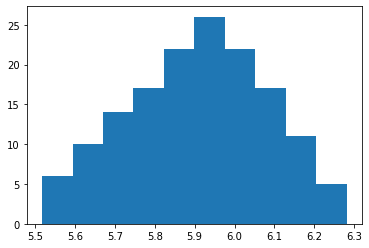

In [19]:
# this code is also similar to the code below where size is the number of required data points, loc is the mean and scale is the standard deviation

pH = np.random.normal(size = 150, loc = 5.9, scale = 0.16)

print(pH)

plt.hist(pH) # display results as a histogram plot

From the data created, the descriptive stats and the histogram, this code creates a good repesentation of the actual data.

The remaining datasets can now be created with the same code using the historical means and standard deviation values

### 3.2.2 Creating a dataset for the assay of excipient A input

[14.25454986 13.59218486 13.73869342 13.80404041 13.85777498 13.90110005
 14.4346972  14.36548067 13.48109915 13.89431813 13.30044269 13.95740809
 14.07618798 14.59964635 14.26098354 13.39948977 14.54432192 13.26370529
 13.86241393 13.92541514 13.39442425 13.913594   13.1959355  14.47034868
 13.66741618 13.97393141 13.86541072 14.4812138  13.5641131  14.26069498
 14.51307067 13.51644284 13.79413171 14.49507919 13.96972009 14.27685202
 13.8658364  13.57320983 14.16164476 13.51836246 13.30948173 13.59834574
 14.0852492  14.09981731 13.34863223 13.00551285 14.139353   14.75388758
 13.90246747 14.59348549 13.93067643 14.72849994 13.22068935 14.04661589
 13.16312444 14.00943698 13.31285812 13.99205919 14.20018615 13.54402884
 13.79921963 13.56908372 13.4630999  13.74059674 13.64071696 13.08508617
 13.2606347  14.58037718 13.60974312 13.24322014 13.99470648 13.91370652
 13.30862281 13.15825075 13.35564322 14.45835648 14.50981485 14.09337503
 14.05855603 14.80850805 13.89909803 14.00221442 13

(array([ 2.,  2.,  9., 20., 25., 35., 26., 20.,  9.,  2.]),
 array([12.40192403, 12.67053259, 12.93914114, 13.2077497 , 13.47635825,
        13.74496681, 14.01357536, 14.28218392, 14.55079247, 14.81940103,
        15.08800958]),
 <a list of 10 Patch objects>)

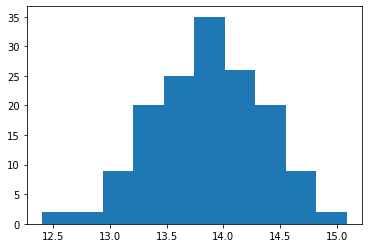

In [20]:
# Assay of excipient A

assay = np.random.normal(13.9, 0.525, 150) # ie create a list of 100 normally distributed numbers where mean is zero and standard deviation is 0.1

print(assay)

plt.hist(assay) # display results as a histogram plot

### 3.2.3 Creating a dataset for the viscosity of excipient B input

[16150.87644502 15000.71480108 15051.43855825 15872.55862191
 15136.69674271 15698.3244851  16076.90790896 16089.20634287
 15558.28567752 15693.78838048 15176.37303678 16238.53069372
 15163.12170781 15158.2028463  15691.66169247 15822.45633692
 16183.77742161 17035.9344577  15648.95240006 15317.85885186
 16842.24856236 15939.68741889 15273.96204233 15701.49033425
 16406.67542776 16759.43430965 16380.3197711  15765.21537748
 16942.70031433 15024.95176087 15461.56632753 15352.65779151
 15865.36724352 15464.39315347 15225.542974   15170.31102304
 16043.76853229 15216.56355089 15477.19660385 15078.06663362
 16111.06957194 15468.37374225 14905.59159892 16385.61909759
 15643.06137808 15568.96566498 15688.08567548 15948.24326159
 15198.03837975 16411.73052436 14810.494359   15553.39652762
 15416.53415825 16282.62738957 15906.4986426  15399.66633209
 15696.68208227 15525.60626053 15754.88794068 15670.24390107
 15903.25567312 15178.86636583 16039.26427406 15399.44430353
 15695.03877405 15357.47

(array([ 7., 18., 21., 36., 18., 28., 13.,  4.,  3.,  2.]),
 array([14682.8758922 , 14954.65844021, 15226.44098823, 15498.22353624,
        15770.00608426, 16041.78863227, 16313.57118029, 16585.35372831,
        16857.13627632, 17128.91882434, 17400.70137235]),
 <a list of 10 Patch objects>)

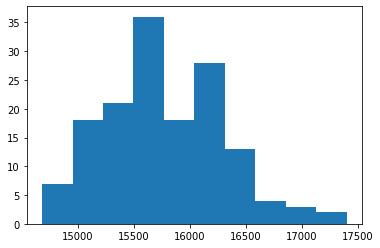

In [21]:
visc = np.random.normal(15671, 590.325, 150) # ie create a list of 100 normally distributed numbers where mean is zero and standard deviation is 0.1

print(visc)

plt.hist(visc) # display results as a histogram plot

### 3.2.4 Creating a dataset for the LOD of excipient C input

LOD values skew towards 0.1% rather than middle of NMT 1% (mean 0.105% and std dev 0.004). There are circumstances where a particular batch of this excipient may have a higher than usual LOD value which is still within specification eg at 0.9%. I would like to create a dataset where most values are around the mean of 0.105% but with some atypical higher results within specification. From the website $reference xx$ the following code is suggested to create long tails.

Long Tails are extreme values at the edge of the distribution and can occur in one or both directions. In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction. To create a data range and plot a tail with an additional 10 uniformly random values in the range 10-to-110 are added to the dataset. This creates a long tail on the distribution.

[0.11961911 0.09949419 0.10024645 0.09534328 0.11278867 0.08428615
 0.12070331 0.09814914 0.10787135 0.10275567 0.11815897 0.08645873
 0.10209825 0.10154351 0.11520392 0.09510098 0.10344815 0.09709927
 0.10537992 0.11024534 0.09509443 0.11530251 0.11311432 0.10952245
 0.1131077  0.09884645 0.10389399 0.09657808 0.10258901 0.1097732
 0.09877505 0.10142922 0.09881545 0.09739315 0.09895878 0.10488602
 0.09494421 0.10710974 0.11993822 0.1116784  0.10327348 0.09701134
 0.09827558 0.12023209 0.10545727 0.09926704 0.10671824 0.1239023
 0.10608143 0.11055483 0.10770153 0.10182975 0.09471734 0.10185592
 0.10311995 0.11027961 0.11255085 0.11337992 0.10757029 0.11296627
 0.09821042 0.11627581 0.10961637 0.10231716 0.10939666 0.10431985
 0.11518466 0.11867835 0.12467018 0.09243153 0.09200298 0.10045981
 0.10644033 0.11288552 0.10784071 0.08680019 0.10224416 0.11245177
 0.10707085 0.1118581  0.10299905 0.10319318 0.10667905 0.10869046
 0.1067847  0.10607108 0.09896404 0.10839807 0.10609639 0.115165

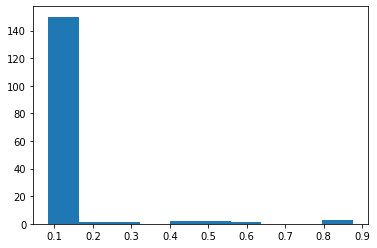

In [22]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)

# generate a univariate data sample

# LOD = std dev * randn(no of data points) + mean result
LOD = 0.009 * randn(150) + 0.105 

# tail = mean + (rand(no of extreme data points) * number to create a range)
tail = 0.105 + (rand(10) * 0.8) # ie create 10 values as a long tail from 0.105 to 0.905 (0.105+0.8). 0.8 was chosen so that tail values remained under the specification limit of NMT 1.0%.

# append the tail data to the regular data
LOD = append(LOD, tail)

print(LOD)

# display results as a histogram plot

pyplot.hist(LOD) 
pyplot.show()

# ref https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/

# code does the right thing as per the histogram but there is some data outside the specification limit of NMT 1.0%. 
# The raw material would not be used in a pharmaceutical batch if it was outside this range.

We can use a simple threshold, such as a value of 25, on this dataset as a cutoff and remove all observations higher than this threshold. We did choose this threshold with prior knowledge of how the data sample was contrived, but you can imagine testing different thresholds on your own dataset and evaluating their effect.

### 3.2.5 Creating a dataset for the number of pH adjustments input

Number of pH adjustments ie NMT 5. Poisson distribution

# format
 
 Poisson Distribution
The Poisson distribution is the limit of the binomial distribution for large N. The Poisson distribution, named after French mathematician Siméon Denis Poisson, is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event. The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume. The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space.

For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. If receiving any particular piece of mail does not affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then reasonable assumption is that the number of pieces of mail received in a day obeys a Poisson distribution. Other examples that may follow a Poisson distribution include the number of phone calls received by a call center per hour and the number of decay events per second from a radioactive source.

The equation is:$${\displaystyle P(k{\text{ events in interval}})={\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$$

where:

$${\lambda}$$
is the average number of events per interval

e is the number 2.71828... (Euler's number) the base of the natural logarithms

k takes values 0, 1, 2, ...

k! = k × (k − 1) × (k − 2) × ... × 2 × 1 is the factorial of k.

The Poisson distribution may be useful to model events such as

The number of meteorites greater than 1 meter diameter that strike Earth in a year
The number of patients arriving in an emergency room between 10 and 11 pm
The number of photons hitting a detector in a particular time interval
Assumptions and validity
The Poisson distribution is an appropriate model if the following assumptions are true:

k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ....
The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
The average rate at which events occur is constant.
Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur. Or
The actual probability distribution is given by a binomial distribution and the number of trials is sufficiently bigger than the number of successes one is asking about (see Related distributions). If these conditions are true, then k is a Poisson random variable, and the distribution of k is a Poisson distribution.
The code used is numpy.random.poisson(lam=1.0, size=None) where lam is a floating number or an array of floating numbers and size is an integer.

The array shape is for example (m, n, k), then m n k samples are drawn. If size is None (default), a single value is returned. Otherwise, np.array(lam).size samples are drawn.

Below show examples of the code in practise:

References:

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson
https://en.wikipedia.org/wiki/Poisson_distribution
http://mathworld.wolfram.com/PoissonDistribution.html

[0 1 2 0 0 0 1 4 1 1 1 0 1 1 2 2 1 1 1 3 1 3 2 1 1 1 1 2 1 4 0 2 2 2 0 0 1
 1 3 0 1 0 1 2 0 0 1 0 0 1 1 0 1 0 1 1 1 2 0 3 3 2 1 2 0 1 1 2 0 3 2 0 0 0
 0 1 0 3 1 1 0 0 1 0 1 1 0 2 2 2 1 1 0 0 1 2 1 1 2 0 0 0 1 0 1 1 1 2 1 1 1
 1 4 0 0 4 1 0 0 0 1 0 1 1 1 1 1 1 2 1 2 1 0 0 1 2 0 1 3 0 0 0 0 1 1 1 1 0
 0 1]


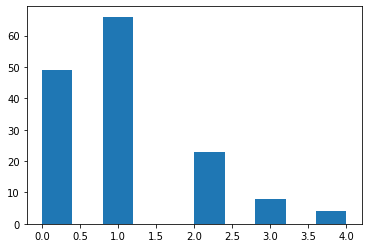

In [23]:
# Create a dataset for number of times the pH has to be adjusted per batch. The limit is no more than 5 times.

pHevents = np.random.poisson(1, 150) #creates an list of 150 data points which are poisson distributed an average number of 1 pH adjustment per batch

print(pHevents)

plt.hist(pHevents) 
plt.show()



## 4.0 Combining the variables into one dataset
Use SQLite (Structured Query Language) which creates simple databases in the memory. SQL is a standard language for storing, manipulating and retrieving data in databases.

aggregation?

In [67]:
import pandas as pd

import matplotlib.pyplot as plt #matplot is the subprogram of python for generating plots

import numpy as np #this tells the program to generate random numbers from the numpy program

import seaborn as sns #import seaborn as sns

# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot


In [68]:
# seed the random number generator
seed(1)

LOD = 0.009 * randn(150) + 0.105 

# tail = mean + (rand(no of extreme data points) * number to create a range)
tail = 0.105 + (rand(10) * 0.8) # ie create 10 values as a long tail from 0.105 to 0.905 (0.105+0.8). 0.8 was chosen so that tail values remained under the specification limit of NMT 1.0%.

# append the tail data to the regular data
LOD = append(LOD, tail)

In [74]:
pHevents = np.random.poisson(1, 150)

In [70]:
assay = np.random.normal(13.9, 0.525, 150)

In [71]:
visc = np.random.normal(15671, 590.325, 150)

In [72]:
pH = np.random.normal(5.9, 0.16, 150)

In [73]:
dates = pd.date_range("1/1/2016", periods=150)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-05-20', '2016-05-21', '2016-05-22', '2016-05-23',
               '2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27',
               '2016-05-28', '2016-05-29'],
              dtype='datetime64[ns]', length=150, freq='D')

In [75]:
data = {
        'pH': [pH],
        'assay' : [assay],
        'visc': [visc], 
        'pHevents': [pHevents],
        'LOD': [append(LOD, tail)], 
   
    }


data #displays the data set as a table/array

{'pH': [array([5.79994528, 5.80498511, 5.84497589, 5.73997293, 6.06719911,
         5.99736235, 5.88890741, 5.88265727, 5.97202488, 6.18245362,
         6.03935517, 5.81864686, 6.02438707, 5.88099661, 5.86816029,
         6.19863542, 5.83296994, 5.82333041, 5.58766315, 5.67562734,
         5.97217967, 5.78881266, 5.98246621, 5.72162063, 5.77723043,
         6.00793131, 6.13374278, 5.99479565, 6.09165293, 6.17273507,
         6.06641426, 5.75304959, 5.88314485, 6.00083131, 5.8336245 ,
         5.97231137, 5.64733499, 5.76741952, 5.98462076, 5.54206616,
         5.722766  , 5.89716507, 5.62489688, 5.90913936, 5.7720724 ,
         5.85334486, 5.85856274, 5.93028691, 5.8097938 , 5.91434983,
         5.80381491, 5.98897176, 6.17100946, 5.93149916, 5.92717908,
         5.71375872, 6.0109386 , 5.77870923, 5.77058445, 5.98919031,
         5.9289662 , 6.07714807, 6.13086031, 5.81365095, 5.92054032,
         6.18166643, 6.05464628, 6.01408785, 6.10899297, 5.80326352,
         6.00185335, 6.12548

In [76]:
df = pd.DataFrame(data, index=dates)

df

,pH,assay,visc,pHevents,LOD
2016-01-01,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-02,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-03,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-04,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-05,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-06,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-07,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-08,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-09,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."
2016-01-10,"[5.799945279765442, 5.804985109239279, 5.84497...","[13.909139939357503, 13.310940167407884, 13.62...","[16038.066153679187, 15316.920390195603, 16334...","[0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2, 0, 2, ...","[0.11961910827296918, 0.09949419227714931, 0.1..."


In [63]:
df = pd.DataFrame({
        'pH': [pH],
        'assay' : [assay],
        'visc': [visc], 
        'pHevents': [pHevents],
        'LOD': [append(LOD, tail)], 
   
    }),


df #displays the data set as a table/array

(                                                  pH  \
 0  [[5.7734720073959735, 6.095795553913618, 5.890...   
 
                                                assay  \
 0  [13.21406961175689, 13.940099752083785, 14.092...   
 
                                                 visc  \
 0  [16309.196221105176, 16688.9515420806, 15433.4...   
 
                                             pHevents  \
 0  [0, 1, 2, 0, 0, 0, 1, 4, 1, 1, 1, 0, 1, 1, 2, ...   
 
                                                  LOD  
 0  [0.11961910827296918, 0.09949419227714931, 0.1...  ,)

Use these references

https://www.mssqltips.com/sqlservertip/6120/data-exploration-with-python-and-sql-server-using-jupyter-notebooks/
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html
https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/


## 5.0 Creating relationships between the various datasets

# potential references
https://pcse.readthedocs.io/en/stable/

https://github.com/theodi/synthetic-data-tutorial

https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Synthetic_data_generation/Synthetic-Data-Generation.ipynb

https://realpython.com/python-random/

https://scipy-lectures.org/

https://medium.com/activewizards-machine-learning-company/top-15-python-libraries-for-data-science-in-in-2017-ab61b4f9b4a7

https://scikit-learn.org/stable/datasets/index.html

https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/tree/master/

https://towardsdatascience.com/creating-a-dataset-using-an-api-with-python-dcc1607616d

https://www.dataquest.io/blog/sci-kit-learn-tutorial/

https://www.dataquest.io/blog/basic-statistics-in-python-probability/

http://greenteapress.com/modsimpy/ModSimPy3.pdf

https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0

https://www.datacamp.com/community/tutorials/probability-distributions-python

https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/

https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/


# X. References (Update as per referencing style as per feedback)

1. https://www.fda.gov/media/71021/download - FDA guidelines for process validation
2. https://www.ich.org/page/quality-guidelines - ICH quality guidelines
3. https://www.pharmaceuticalonline.com/doc/design-space-development-how-and-when-to-get-started-0001 - a paper on the theory of design space.
4. https://en.wikipedia.org/wiki/Quality_by_Design - overview of QBD
5. https://en.wikipedia.org/wiki/Cream_(pharmaceutical) - Brief introduction to creams
6. https://wiki.anton-paar.com/en/consistency-measurement/ - explanation of the consistency measurement
7. https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459 - explanation of Poisson distribution and code to create Poisson distributed dataset.


# END